In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("restaurant.csv")
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
4111,2680171,zuQiEjAULshRY2suO-vWOg,ZYgrz22Qj2Ez-e2S7-WklA,RESDUcs7fIiihp38-d6_6g,5,6,4,6,I have tried most of the known buffets in Vega...,2014-08-05 06:31:21
1734,2502955,57VRmSgH71Qcz8QMDcAVkg,ZmtW5Rb6yPZmEcVkdzq39A,RESDUcs7fIiihp38-d6_6g,5,1,0,1,I've tried all the major buffets in Vegas exce...,2014-04-23 05:30:00
5504,2785185,OCqdpLnFuyzWH-hsi8fyyA,zPkIijSBtc3xX44cu1aT8A,RESDUcs7fIiihp38-d6_6g,4,0,0,1,Got the Groupon for $80 for 2 people. We came ...,2017-09-05 19:50:30
6695,2880408,mt7YUMbEulA6thRWMFSUoQ,KuR2m-ww2wW_9lRVXmoRwA,RESDUcs7fIiihp38-d6_6g,4,0,0,0,Wow! The food was amazing. I kept my portions ...,2019-02-04 18:10:40
3457,2631893,8eIGnM3afIFtfZ1W_C3ACA,zmOdU_artMpKrG-AWYOSPQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,One of the better buffets on the Las Vegas str...,2015-10-15 01:27:25


In [3]:
df=df[['stars','text']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10417 non-null  int64 
 1   text    10417 non-null  object
dtypes: int64(1), object(1)
memory usage: 162.9+ KB


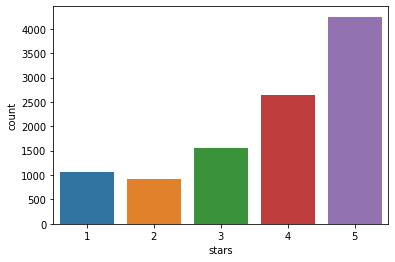

In [5]:
sns.countplot(df['stars']);

In [6]:
df['stars'].value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [7]:
df.sample(5)

,stars,text
5348,5,"This is my new favorite buffet in Vegas, repla..."
538,5,"The best buffet in Las Vegas, no long lines to..."
2827,3,Food was average buffet food nothing special f...
7804,5,We had heard sooo many good things about this ...
2543,3,This place is supposed to be one of the best b...


In [8]:
df["text"]=df["text"].str.lower()
df["text"]=df["text"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırı
df["text"]=df["text"].str.replace("\d+","") #d digit rakamları kaldır
df["text"]=df["text"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [9]:
df.loc[df['stars']==3,"sentiment"]=1
df.loc[df['stars']<3,"sentiment"]=0
df.loc[df['stars']>3,"sentiment"]=2

In [10]:
from langdetect import detect
df["language"] = df["text"].apply(detect)

In [11]:
df

,stars,text,sentiment,language
0,5,after getting food poisoning at the palms hote...,2.0,en
1,4,a feast worthy of gods baccarnal buffet in ca...,2.0,en
2,4,the crab legs are better than the ones at wick...,2.0,en
3,1,not worth it too salty food and expensive this...,0.0,en
4,5,i would give this infinite stars if i could my...,2.0,en
...,...,...,...,...
10412,5,best buffet ever irma was great served us bett...,2.0,en
10413,4,hollllllyyyy moleyyyy this buffet was one fo...,2.0,en
10414,5,the selection is amazing and all the food is e...,2.0,en
10415,4,one of the best buffets ive had in vegas my on...,2.0,en


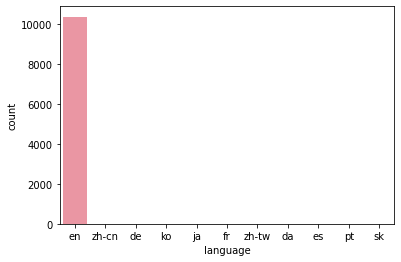

In [12]:
sns.countplot(df['language'])

In [13]:
df=df[df['language']=='en']
df.reset_index(drop=True,inplace=True)

In [14]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [15]:
negative_data=df[df['sentiment']==0]['text']
positive_data=df[df['sentiment']==2]['text']
neutral_data=df[df['sentiment']==1]['text']

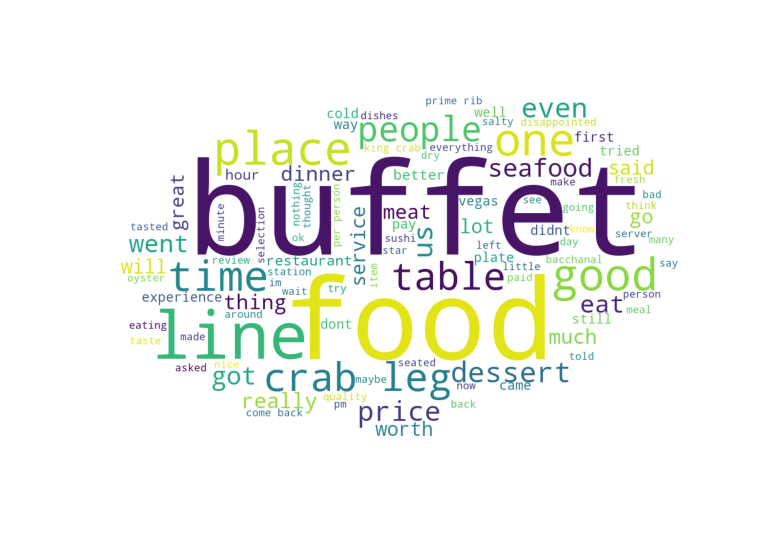

In [16]:
wc(negative_data,'white')

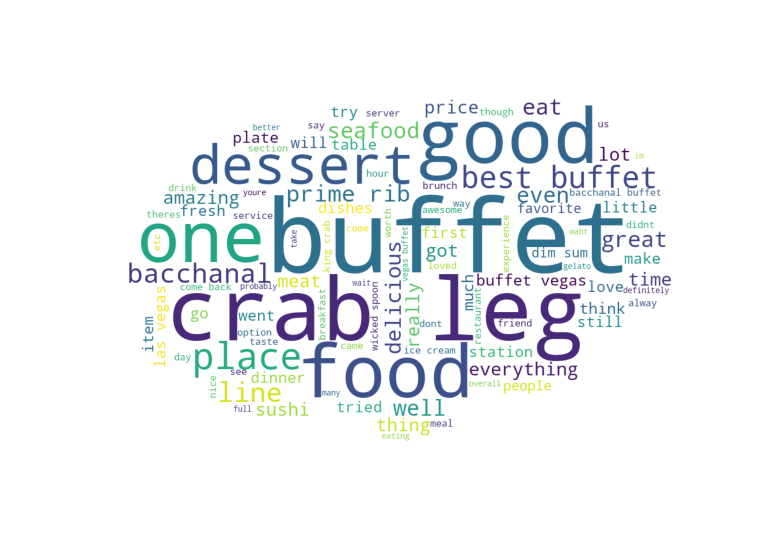

In [17]:
wc(positive_data,'white')

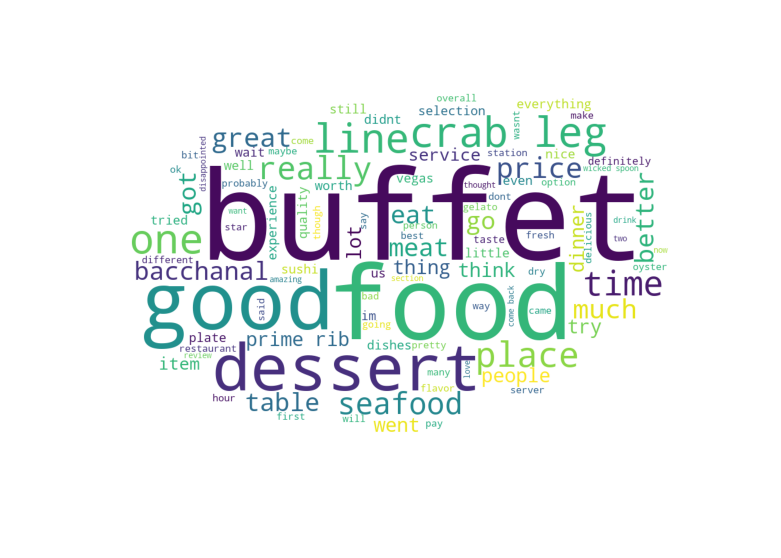

In [18]:
wc(neutral_data,'white')

In [19]:
df1=df[['text','sentiment']]

In [20]:
df1

,text,sentiment
0,after getting food poisoning at the palms hote...,2.0
1,a feast worthy of gods baccarnal buffet in ca...,2.0
2,the crab legs are better than the ones at wick...,2.0
3,not worth it too salty food and expensive this...,0.0
4,i would give this infinite stars if i could my...,2.0
...,...,...
10370,best buffet ever irma was great served us bett...,2.0
10371,hollllllyyyy moleyyyy this buffet was one fo...,2.0
10372,the selection is amazing and all the food is e...,2.0
10373,one of the best buffets ive had in vegas my on...,2.0


In [21]:
df1["text"] = df1["text"].apply(lambda x: word_tokenize(x.lower()))
df1.head()

,text,sentiment
0,"[after, getting, food, poisoning, at, the, pal...",2.0
1,"[a, feast, worthy, of, gods, baccarnal, buffet...",2.0
2,"[the, crab, legs, are, better, than, the, ones...",2.0
3,"[not, worth, it, too, salty, food, and, expens...",0.0
4,"[i, would, give, this, infinite, stars, if, i,...",2.0


In [22]:
from textblob import Word
from nltk.corpus import stopwords
stop_words = list(stopwords.words("english"))
df1["text"] = df1["text"].apply(lambda x: [word for word in x if word not in stop_words])
df1.head()

,text,sentiment
0,"[getting, food, poisoning, palms, hotel, scare...",2.0
1,"[feast, worthy, gods, baccarnal, buffet, caesa...",2.0
2,"[crab, legs, better, ones, wicked, spoon, huge...",2.0
3,"[worth, salty, food, expensive, furst, kast, v...",0.0
4,"[would, give, infinite, stars, could, family, ...",2.0


In [23]:
df1["text"] = df1["text"].apply(lambda x: " ".join(x))
df1.head()

,text,sentiment
0,getting food poisoning palms hotel scared eat ...,2.0
1,feast worthy gods baccarnal buffet caesar pala...,2.0
2,crab legs better ones wicked spoon huge prawns...,2.0
3,worth salty food expensive furst kast visit bu...,0.0
4,would give infinite stars could family diamond...,2.0


In [24]:
from nltk.stem import WordNetLemmatizer
df1["text"]= df1["text"].apply(lambda x: WordNetLemmatizer().lemmatize(x))

In [25]:
df1

,text,sentiment
0,getting food poisoning palms hotel scared eat ...,2.0
1,feast worthy gods baccarnal buffet caesar pala...,2.0
2,crab legs better ones wicked spoon huge prawns...,2.0
3,worth salty food expensive furst kast visit bu...,0.0
4,would give infinite stars could family diamond...,2.0
...,...,...
10370,best buffet ever irma great served us better p...,2.0
10371,hollllllyyyy moleyyyy buffet one books iv neve...,2.0
10372,selection amazing food excellently prepared es...,2.0
10373,one best buffets ive vegas visit unfortunately...,2.0


In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
X = vect.fit_transform(df1["text"])

In [27]:
y = df1["sentiment"]
X = df1["text"]

In [28]:
from pycaret.classification import *
exp_name = setup(data=df1, target="sentiment")
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6608,0.5023,0.3333,0.4367,0.5259,0.0000,0.0000,6.080
ada,Ada Boost Classifier,0.6608,0.5000,0.3333,0.4367,0.5259,0.0000,0.0000,10.974
gbc,Gradient Boosting Classifier,0.6608,0.5000,0.3333,0.4367,0.5259,0.0000,0.0000,125.981
lightgbm,Light Gradient Boosting Machine,0.6608,0.5000,0.3333,0.4367,0.5259,0.0000,0.0000,0.984
dt,Decision Tree Classifier,0.6607,0.4999,0.3333,0.4367,0.5258,-0.0002,-0.0018,216.646
svm,SVM - Linear Kernel,0.6607,0.0000,0.3333,0.4367,0.5258,-0.0002,-0.0018,9.457
ridge,Ridge Classifier,0.6607,0.0000,0.3333,0.4367,0.5258,-0.0002,-0.0018,5.552
rf,Random Forest Classifier,0.6607,0.4999,0.3333,0.4367,0.5258,-0.0002,-0.0018,87.203
et,Extra Trees Classifier,0.6607,0.4999,0.3333,0.4367,0.5258,-0.0002,-0.0018,202.201
knn,K Neighbors Classifier,0.6094,0.4990,0.3331,0.4613,0.4773,-0.0010,-0.0078,87.092
